In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_preds = pd.read_csv("../output/predictions.csv")

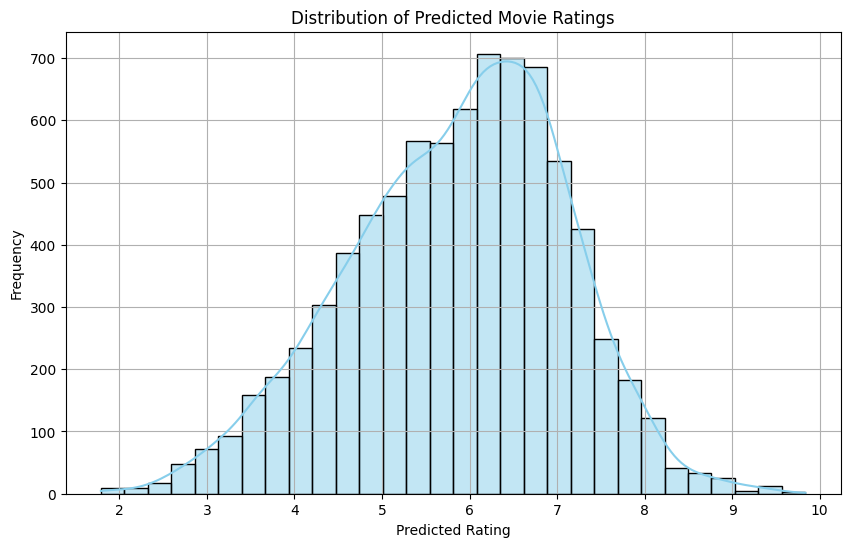

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df_preds['predicted_rating'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Movie Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

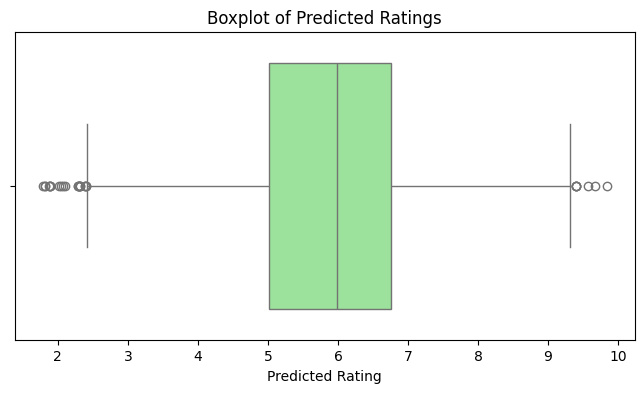

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_preds['predicted_rating'], color='lightgreen')
plt.title('Boxplot of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.show()

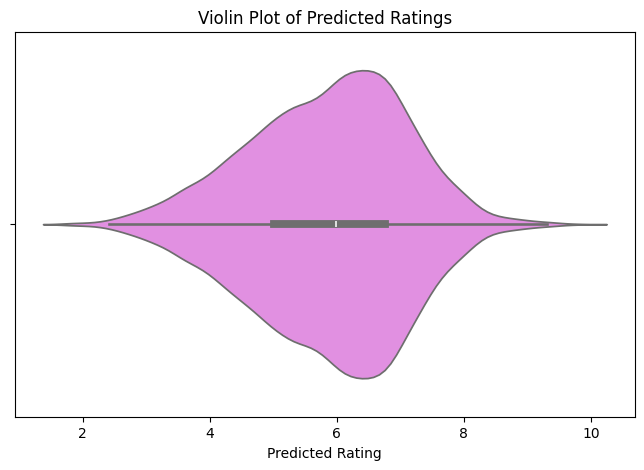

In [7]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df_preds['predicted_rating'], color='violet')
plt.title('Violin Plot of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.show()

In [11]:
df_preds.describe()

,predicted_rating
count,7919.000000
mean,5.858632
std,1.237999
min,1.789000
25%,5.016000
50%,5.990000
75%,6.753500
max,9.837000


In [12]:
# Agar original dataset accessible hai
df = pd.read_csv("../dataset/movie_data_featured.csv", encoding="cp1252")

# Actual ratings
actual = df['rating'].reset_index(drop=True)

# Predicted ratings (already saved earlier)
predicted = pd.read_csv("../output/predictions.csv")["predicted_rating"]

# Merge into one DataFrame
df_eval = pd.DataFrame({
    "actual": actual,
    "predicted": predicted
})

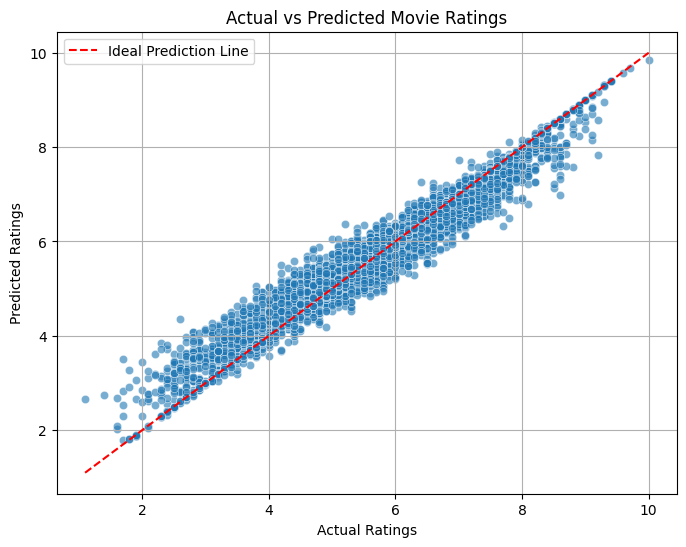

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_eval, x="actual", y="predicted", alpha=0.6)
plt.plot([df_eval.actual.min(), df_eval.actual.max()], [df_eval.actual.min(), df_eval.actual.max()], 'r--', label="Ideal Prediction Line")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.legend()
plt.grid(True)
plt.show()

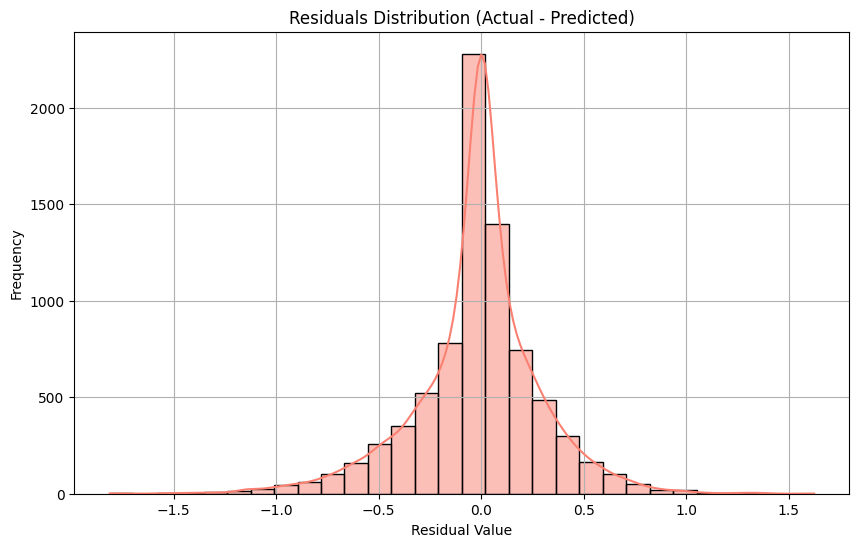

In [14]:
df_eval["residuals"] = df_eval["actual"] - df_eval["predicted"]

plt.figure(figsize=(10, 6))
sns.histplot(df_eval["residuals"], bins=30, kde=True, color="salmon")
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

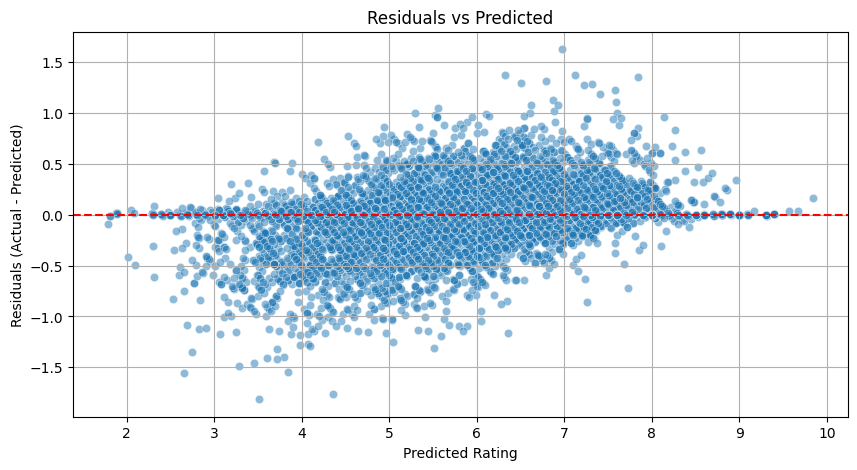

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_eval["predicted"], y=df_eval["residuals"], alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(df_eval["actual"], df_eval["predicted"])
rmse = np.sqrt(mean_squared_error(df_eval["actual"], df_eval["predicted"]))
r2 = r2_score(df_eval["actual"], df_eval["predicted"])

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

MAE: 0.209
RMSE: 0.309
R2 Score: 0.950
